## HELLO
this is a good way to die

In [1]:
# Required Python Packages
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
#py.sign_in('YOUR_PLOTLY_USER_NAME', 'API_KEY')
 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

/home/daniel/anaconda/envs/siemens/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
table1_dir = "/home/daniel/dev/siemens_test/tasks_siemens_data_lab/Training_part1.csv"
table2_dir = "/home/daniel/dev/siemens_test/tasks_siemens_data_lab/Training_part2.csv"
table_merged_dir = "output.csv"

table1 = pd.read_csv(table1_dir,sep=';')
table2 = pd.read_csv(table2_dir,sep=';')
table1_clean = table1.drop_duplicates(subset='id',keep='first')
table2_clean = table2.drop_duplicates(subset='id',keep='first')
assert len(table1_clean) == len(table2_clean)
table_merged = table1_clean.merge(table2_clean, on='id')
table_merged_indexed = table_merged.set_index('id')
table_merged_indexed.to_csv(table_merged_dir,index=False)

In [3]:
dataset = table_merged_indexed
training_features = ['BIB','COD','ERG','FAN','GJAH','LUK','MYR','NUS','PKD','RAS','SIS','TOK','UIN','VOL','WET','KAT','XIN']
target = 'Class'
import pickle


In [4]:
# Train , Test data split
train_x, test_x, train_y, test_y = train_test_split(dataset[training_features], dataset[target], train_size=0.7)
    
print("train_x size :: ", train_x.shape)
print("train_y size :: ", train_y.shape)

print("test_x size :: ", test_x.shape)
print("test_y size :: ", test_y.shape)

train_x size ::  (2590, 17)
train_y size ::  (2590,)
test_x size ::  (1110, 17)
test_y size ::  (1110,)


In [5]:
observations = pd.unique(dataset['BIB'].values.ravel())
observations

array([160, 153,   5,   9,  40,   8, 152, 176, 154,  95, 121, 155,  91,
        19, 125, 128,  37,  31,  25, 164,  78, 131,  27,  50,  10, 163,
       171,  12,  22, 174,  80,   2,  17,  46, 145, 129,  99,  34,  13,
        54, 127,  60,  88, 151, 147,  28,  85, 158,  68, 167, 173,  36,
       168,  18, 172,  56, 142, 106,  94,   6,   4,  35, 156,  49,  64,
       118,  16,  41, 161,   1,  69, 175,  51,  83, 166, 114,  98, 101,
        57,  47,  79, 141, 100, 157, 179,  32,  20, 119,  44,  26, 135,
         3,  92,  89,  86, 139,  30, 132, 109, 108,  55,  58, 177,  81,
        67, 178,  75,   7, 162,  23, 146,  73,  42,  63, 165,  24,  66,
        48,  84, 148,  33, 116, 144,  61, 115, 150,  15,  21,  29,  39,
        59, 105,  87,  76,  96,  93,  43, 123, 120, 112, 138, 110,  62,
       137, 136, 143, 159, 169, 124, 122, 149,  11,  53,  65, 103, 134,
        71, 104,  70, 170, 133,  77,  14,  52, 117,  45,  38, 107,  90,
       126, 130, 140,  97, 113,  74,  82, 102,  72, 111])

In [ ]:
print(sorted(observations))

In [111]:
print(obs_sorted)

None


In [6]:
dataset

,BIB,COD,ERG,FAN,GJAH,LUK,MYR,NUS,PKD,RAS,SIS,TOK,UIN,VOL,WET,KAT,XIN,Class
id,,,,,,,,,,,,,,,,,,
0,160,iii,www,80.0,iii,5.0,eee,800000.0,xxx,t,1.750,t,17.92,f,1,ccc,t,n
1,153,uuu,aaa,200.0,rrr,0.0,mmm,2000000.0,xxx,NaN,0.290,f,16.92,f,0,ddd,f,n
2,5,iii,www,96.0,iii,19.0,hh,960000.0,hh,t,0.000,f,31.25,f,1,ddd,t,n
3,9,iii,www,0.0,iii,120.0,kkk,0.0,qqq,NaN,0.335,f,48.17,f,0,ccc,f,n
4,40,iii,www,232.0,iii,0.0,mmm,2320000.0,xxx,f,0.500,t,32.33,f,0,ddd,f,n
5,8,iii,aaa,160.0,rrr,0.0,kkk,1600000.0,jjj,f,0.500,t,34.83,f,0,ccc,f,n
6,152,iii,www,276.0,iii,1.0,lll,2760000.0,lll,NaN,0.000,t,26.17,f,0,ccc,f,n
7,176,iii,aaa,280.0,rrr,204.0,eee,2800000.0,jjj,NaN,0.250,f,21.17,f,0,ddd,f,n
8,154,iii,www,220.0,iii,140.0,eee,2200000.0,xxx,NaN,0.290,f,28.92,f,0,ddd,f,n


In [9]:
def unique_observations(dataset, header, method=1):
    """
    To get unique observations in the loaded pandas DataFrame column
    :param dataset:
    :param header:
    :param method: Method to perform the unique (default method=1 for pandas and method=0 for numpy )
    :return:
    """
    try:
        if method == 0:
            # With Numpy
            observations = np.unique(dataset[[header]])
        elif method == 1:
            # With Pandas
            observations = pd.unique(dataset[header].values.ravel())
        else:
            observations = None
            print("Wrong method type, Use 1 for pandas and 0 for numpy")
    except Exception as e:
        observations = None
        print("Error: {error_msg} /n Please check the inputs once..!".format(error_msg=e.message))
    return observations


def feature_target_frequency_relation(dataset, f_t_headers):

    """
    To get the frequency relation between targets and the unique feature observations
    :param dataset:
    :param f_t_headers: feature and target header
    :return: feature unique observations dictionary of frequency count dictionary
    """

    feature_unique_observations = unique_observations(dataset, f_t_headers[0])
    unique_targets = unique_observations(dataset, f_t_headers[1])

    frequencies = {}
    for feature in feature_unique_observations:
        frequencies[feature] = {unique_targets[0]: len(
            dataset[(dataset[f_t_headers[0]] == feature) & (dataset[f_t_headers[1]] == unique_targets[0])]),
            unique_targets[1]: len(
                dataset[(dataset[f_t_headers[0]] == feature) & (dataset[f_t_headers[1]] == unique_targets[1])])}
    return frequencies


In [11]:
f_t_headers = ['KAT','Class']
feature_target_frequency_relation(dataset,f_t_headers)

{'ccc': {'n': 79, 'y': 1200},
 'ddd': {'n': 190, 'y': 2192},
 nan: {'n': 0, 'y': 0}}

In [16]:
def feature_target_histogram(feature_target_frequencies, feature_header):
    """
    
    :param feature_target_frequencies: 
    :param feature_header: 
    :return: 
    """
    keys = list(feature_target_frequencies.keys())
    y0 = [feature_target_frequencies[key]['y'] for key in keys]
    y1 = [feature_target_frequencies[key]['n'] for key in keys]

    
    trace1 = go.Bar(
        x=keys,
        y=y0,
        name='y'
    )
    trace2 = go.Bar(
        x=keys,
        y=y1,
        name = 'n'
    )
 
    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group',
        title='Feature :: ' + feature_header + ' yes vs no',
        xaxis=dict(title="Feature :: " + feature_header + " classes"),
        yaxis=dict(title="Class Frequency")
    )
    fig = go.Figure(data=data, layout=layout)

    fig = go.Figure(data=data)
    # plot_url = py.plot(fig, filename=feature_header + ' - Target - Histogram')
    py.image.save_as(fig, filename=feature_header + '_Target_Histogram.png')

In [17]:
for feature in training_features:
    feature_target_frequencies = feature_target_frequency_relation(dataset, [feature, target])
    feature_target_histogram(feature_target_frequencies, feature)

In [19]:
def train_logistic_regression(train_x, train_y):
    """
    Training logistic regression model with train dataset features(train_x) and target(train_y)
    :param train_x:
    :param train_y:
    :return:
    """
 
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(train_x, train_y)
    return logistic_regression_model

In [7]:
train_x

,BIB,COD,ERG,FAN,GJAH,LUK,MYR,NUS,PKD,RAS,SIS,TOK,UIN,VOL,WET,KAT,XIN
id,,,,,,,,,,,,,,,,,
1912,147,iii,www,340.0,iii,4071.0,zzz,3400000.0,xxx,NaN,0.750,t,33.17,t,7,ddd,t
3126,27,iii,www,60.0,iii,2184.0,eee,600000.0,xxx,NaN,1.085,t,23.08,t,11,ddd,t
3241,107,iii,www,80.0,iii,1349.0,ee,800000.0,xxx,NaN,0.040,f,22.92,t,0,ccc,f
3568,68,iii,www,0.0,iii,11202.0,mmm,0.0,xxx,t,6.290,f,52.50,t,15,ddd,t
1008,176,iii,www,396.0,iii,0.0,ooo,3960000.0,xxx,t,0.960,t,28.25,t,3,ddd,t
423,27,iii,www,260.0,iii,246.0,kkk,2600000.0,jjj,NaN,0.210,f,37.33,f,0,ccc,f
3185,101,iii,www,121.0,iii,0.0,zzz,1210000.0,xxx,NaN,0.290,f,21.83,t,6,ddd,t
2281,1,rrr,NaN,NaN,NaN,0.0,NaN,NaN,NaN,f,0.000,f,23.17,f,0,ddd,f
2491,1,iii,www,0.0,iii,0.0,eee,0.0,xxx,NaN,2.500,f,44.33,t,0,ccc,f


In [11]:
rf.fit(train_x,train_y)

ValueError: could not convert string to float: 't'

In [10]:
train_y.replace(('y', 'n'), (1, 0), inplace=True)

In [67]:
ty=train_y
ty.replace(('y', 'n'), (1, 0), inplace=True)

In [68]:
train_y

id
402     1
923     1
2724    1
2290    1
3310    1
2306    1
1860    1
3495    1
3241    1
1835    1
161     0
802     1
1069    1
1997    1
3561    1
3431    1
3573    1
2692    1
614     1
3497    1
3359    1
562     1
288     0
840     1
1421    1
348     0
3685    1
1658    1
2124    1
1250    1
       ..
542     1
3221    1
2422    1
2695    1
2345    1
304     0
2370    1
2893    1
528     1
3615    1
2094    1
1282    1
1004    1
1055    1
1295    1
3408    1
766     1
1496    1
2662    1
1990    1
56      1
0       0
218     0
892     1
608     1
146     0
351     0
1856    1
1226    1
3577    1
Name: Class, Length: 2590, dtype: int64

In [71]:
test_y.replace(('y', 'n'), (1, 0), inplace=True)

In [72]:
test_y

id
3323    1
244     0
1296    1
230     0
203     1
1680    1
886     1
1599    1
1822    1
2092    1
2519    1
1689    1
2322    1
1395    1
2887    1
1519    1
3659    1
2192    1
2079    1
1415    1
1037    1
1172    1
3367    1
3586    1
1637    1
1661    1
2660    1
100     0
741     1
2834    1
       ..
1011    1
3507    1
1560    1
3502    1
416     0
1759    1
66      1
2362    1
685     1
3621    1
2399    1
3150    1
1670    1
2621    1
2566    1
2329    1
483     0
2065    1
2107    1
3108    1
1144    1
2381    1
1817    1
2908    1
1201    1
3113    1
1007    1
1806    1
2411    1
506     1
Name: Class, Length: 1110, dtype: int64

In [77]:
train_x

,BIB,COD,ERG,FAN,GJAH,LUK,MYR,NUS,PKD,RAS,SIS,TOK,UIN,VOL,WET,KAT,XIN
id,,,,,,,,,,,,,,,,,
402,1,rrr,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000,f,71.58,f,0,ccc,f
923,17,iii,aaa,160.0,rrr,5777.0,eee,1600000.0,xxx,NaN,1.000,t,26.67,t,5,ddd,t
2724,1,iii,www,0.0,iii,0.0,ee,0.0,xxx,f,0.085,f,23.17,t,0,ddd,f
2290,75,iii,www,0.0,iii,5000.0,kkk,0.0,ff,t,7.585,t,49.50,t,15,ddd,t
3310,83,iii,aaa,80.0,rrr,500.0,eee,800000.0,xxx,t,1.000,t,18.92,t,4,ccc,t
2306,148,iii,www,400.0,iii,0.0,kkk,4000000.0,jjj,NaN,5.125,f,42.00,t,0,ddd,f
1860,60,iii,www,0.0,iii,0.0,ggg,0.0,bbb,t,13.000,t,67.75,t,1,ddd,t
3495,129,iii,www,0.0,iii,247.0,lll,0.0,hh,t,0.000,f,56.50,t,15,ccc,t
3241,107,iii,www,80.0,iii,1349.0,ee,800000.0,xxx,NaN,0.040,f,22.92,t,0,ccc,f


In [57]:
ty

id
3198    1
1665    1
211     0
1023    1
1054    1
1504    1
2301    1
1394    1
22      0
466     1
1273    1
776     1
3094    1
2641    1
3684    1
1511    1
1976    1
979     1
3088    1
1349    1
2904    1
890     1
248     1
1100    1
2625    1
1606    1
2884    1
2969    1
27      0
1416    1
       ..
3151    1
2814    1
2238    1
1079    1
3360    1
535     1
2150    1
760     1
1204    1
2321    1
3341    1
3331    1
2883    1
3219    1
1381    1
1525    1
17      0
2759    1
2075    1
2243    1
1672    1
155     0
2187    1
2524    1
2345    1
2570    1
2610    1
1356    1
1272    1
1697    1
Name: Class, Length: 2590, dtype: int64

In [74]:
train_y

id
402     1
923     1
2724    1
2290    1
3310    1
2306    1
1860    1
3495    1
3241    1
1835    1
161     0
802     1
1069    1
1997    1
3561    1
3431    1
3573    1
2692    1
614     1
3497    1
3359    1
562     1
288     0
840     1
1421    1
348     0
3685    1
1658    1
2124    1
1250    1
       ..
542     1
3221    1
2422    1
2695    1
2345    1
304     0
2370    1
2893    1
528     1
3615    1
2094    1
1282    1
1004    1
1055    1
1295    1
3408    1
766     1
1496    1
2662    1
1990    1
56      1
0       0
218     0
892     1
608     1
146     0
351     0
1856    1
1226    1
3577    1
Name: Class, Length: 2590, dtype: int64

In [78]:
# Training Logistic regression model
trained_logistic_regression_model = train_logistic_regression(train_x, train_y)

ValueError: could not convert string to float: 't'

In [13]:
dataset.isnull().sum()

BIB         0
COD         0
ERG        64
FAN       100
GJAH       64
LUK         0
MYR        66
NUS       100
PKD        66
RAS      2145
SIS         0
TOK         0
UIN        39
VOL         0
WET         0
KAT        39
XIN         0
Class       0
dtype: int64

In [23]:
dataset

,BIB,COD,ERG,FAN,GJAH,LUK,MYR,NUS,PKD,RAS,SIS,TOK,UIN,VOL,WET,KAT,XIN,Class
id,,,,,,,,,,,,,,,,,,
0,160,iii,www,80.0,iii,5.0,eee,800000.0,xxx,t,1.750,t,17.92,f,1,ccc,t,n
1,153,uuu,aaa,200.0,rrr,0.0,mmm,2000000.0,xxx,NaN,0.290,f,16.92,f,0,ddd,f,n
2,5,iii,www,96.0,iii,19.0,hh,960000.0,hh,t,0.000,f,31.25,f,1,ddd,t,n
3,9,iii,www,0.0,iii,120.0,kkk,0.0,qqq,NaN,0.335,f,48.17,f,0,ccc,f,n
4,40,iii,www,232.0,iii,0.0,mmm,2320000.0,xxx,f,0.500,t,32.33,f,0,ddd,f,n
5,8,iii,aaa,160.0,rrr,0.0,kkk,1600000.0,jjj,f,0.500,t,34.83,f,0,ccc,f,n
6,152,iii,www,276.0,iii,1.0,lll,2760000.0,lll,NaN,0.000,t,26.17,f,0,ccc,f,n
7,176,iii,aaa,280.0,rrr,204.0,eee,2800000.0,jjj,NaN,0.250,f,21.17,f,0,ddd,f,n
8,154,iii,www,220.0,iii,140.0,eee,2200000.0,xxx,NaN,0.290,f,28.92,f,0,ddd,f,n


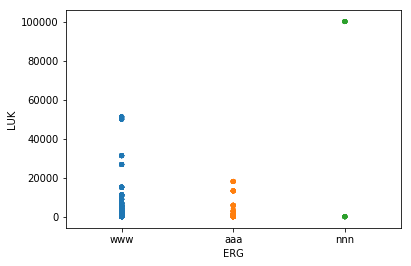

In [28]:
sns.stripplot(x="ERG", y= "LUK", data=dataset)

In [37]:
observations = pd.unique(dataset['XIN'].values.ravel())
observations

array(['t', 'f'], dtype=object)